# <font color='green'> Análisis de Datos </font>

Antes de comenzar, se importa el paquete *os* y se define el directorio donde se encuentra el notebook. 

In [1]:
import os
path = 'C:/Users/p_san/OneDrive/Escritorio/master_uned_modulo_1/Introducción a Python' # cambiar la ruta donde se encuentran los ficheros en el PC

## <font color='green'> 1. Lectura y escritura de ficheros </font>

In [2]:
import csv 

### <font color='green'> 1.1 Ficheros csv </font>

#### <font color='green'> Lectura: sentencia *reader* </font>

- Lectura de cabeceras

In [3]:
with open(os.path.join(path, 'info_personas.csv')) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')

    contar_lineas = 0
    for row in csv_reader:
        if contar_lineas == 0:
            print(f'Los campos del fichero son {row}')
            contar_lineas = contar_lineas + 1

Los campos del fichero son ['Nombre;Provincia;Nivel_Estudios;Edad']


- Lectura de los registros

In [4]:
with open(os.path.join(path, 'info_personas.csv')) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')

    contar_lineas= 0
    next(csv_reader, None)  # omitir encabezado
    for row in csv_reader:
        print(row)
        contar_lineas = contar_lineas +1
    print(f'Total de líneas {contar_lineas} lines.')

['Pablo;Avila;Grado;28']
['Luis;Madrid;Bachiller;45']
['Fran;Toledo;Licenciatura;34']
['Maria;Barcelona;Doctor;56']
['Bea;Malaga;Basico;22']
['Emilio;Salamanca;Bachiller;37']
['Juan;Caceres;Grado;21']
['Laura;Vitoria;Licenciatura;40']
Total de líneas 8 lines.


#### <font color='green'> Lectura: sentencia *DictReader* </font>

Importación del fichero en formato diccionario

In [5]:
results= []

with open(os.path.join(path, 'info_personas.csv')) as csv_file:
    csv_reader = csv.DictReader(csv_file, delimiter=',')

    for row in csv_reader:
        results.append(row)

    print(results)

[{'Nombre;Provincia;Nivel_Estudios;Edad': 'Pablo;Avila;Grado;28'}, {'Nombre;Provincia;Nivel_Estudios;Edad': 'Luis;Madrid;Bachiller;45'}, {'Nombre;Provincia;Nivel_Estudios;Edad': 'Fran;Toledo;Licenciatura;34'}, {'Nombre;Provincia;Nivel_Estudios;Edad': 'Maria;Barcelona;Doctor;56'}, {'Nombre;Provincia;Nivel_Estudios;Edad': 'Bea;Malaga;Basico;22'}, {'Nombre;Provincia;Nivel_Estudios;Edad': 'Emilio;Salamanca;Bachiller;37'}, {'Nombre;Provincia;Nivel_Estudios;Edad': 'Juan;Caceres;Grado;21'}, {'Nombre;Provincia;Nivel_Estudios;Edad': 'Laura;Vitoria;Licenciatura;40'}]


In [6]:
for i in results:
    for j in i.values():
        print(j)

Pablo;Avila;Grado;28
Luis;Madrid;Bachiller;45
Fran;Toledo;Licenciatura;34
Maria;Barcelona;Doctor;56
Bea;Malaga;Basico;22
Emilio;Salamanca;Bachiller;37
Juan;Caceres;Grado;21
Laura;Vitoria;Licenciatura;40


#### <font color='green'> Escritura: sentencia *writer* </font>


In [7]:
datos1 = [["Nombre", "Provincia", "Nivel_Estudios", "Edad"],
           ["Maca", "Valencia", "Licenciatura", 37],
           ["Roberto", "Pontevedra", "Basico", 19]]

In [8]:
with open(os.path.join(path, 'info_personas2a.csv'), 'w', newline='') as file:
    writer = csv.writer(file, delimiter=';')
    writer.writerows(datos1)

#### <font color='green'> Escritura: sentencia *Dictwriter* </font>

In [9]:
datos2 = [{'Nombre': 'Maca', 'Provincia': 'Valencia', 'Nivel_Estudios': 'Licenciatura', 'Edad':37}, 
{'Nombre': 'Roberto', 'Provincia': 'Pontevedra', 'Nivel_Estudios': 'Basico', 'Edad':19}]

cabecera = ['Nombre', 'Provincia', 'Nivel_Estudios', 'Edad']

In [10]:
with open(os.path.join(path, 'info_personas2b.csv'), 'w', newline='') as file:
    writer = csv.DictWriter(file, delimiter=';', fieldnames= cabecera)
    writer.writeheader()
    writer.writerows(datos2)

### <font color='green'> 1.2 Ficheros json </font>

In [11]:
import json

#### <font color='green'> Lectura del fichero </font>


In [12]:
with open(os.path.join(path, 'config.json')) as file:
    data = json.load(file)

- Información del fichero

In [13]:
data

{'umbrales': {'riesgo_bajo': 100,
  'riesgo_medio_bajo': 150,
  'riesgo_medio_alto': 190},
 'fecha_model': {'time_init': '2015-01-01',
  'time_end': '2021-09-30',
  'time_use': 'today'},
 'parametros_model': {'semilla': 123,
  'split': 0.3,
  'n_estimators': 50,
  'max_depth': 6,
  'min_samples_split': 4}}

El fichero *json* es leído como un *diccionario* de forma que se puede iterar sobre él.

- Manipulación del fichero

In [14]:
data.keys()

dict_keys(['umbrales', 'fecha_model', 'parametros_model'])

In [15]:
data.values()

dict_values([{'riesgo_bajo': 100, 'riesgo_medio_bajo': 150, 'riesgo_medio_alto': 190}, {'time_init': '2015-01-01', 'time_end': '2021-09-30', 'time_use': 'today'}, {'semilla': 123, 'split': 0.3, 'n_estimators': 50, 'max_depth': 6, 'min_samples_split': 4}])

In [16]:
for i in data['umbrales'].items():
    print(i)

('riesgo_bajo', 100)
('riesgo_medio_bajo', 150)
('riesgo_medio_alto', 190)


#### <font color='green'> Escritura del fichero </font>

De igual forma, un *diccionario* se puede guardar como un fichero *json*

In [17]:
datos_personales = {'Nombre':'Pablo', 'Apellido':'Sanchez', 'Residencia':'Madrid'}

In [18]:
with open(os.path.join(path,'datos_personales.json'), 'w') as file:
    json.dump(datos_personales, file)

### <font color='green'> 1.3 Ficheros yaml </font>

In [19]:
import yaml

#### <font color='green'> Lectura del fichero </font>


In [20]:
with open(os.path.join(path, 'config_data_model.yaml')) as file:
    data = yaml.load(file, Loader=yaml.FullLoader)

- Información del fichero

In [21]:
data

{'data': {'target': 'class',
  'features': ['checking_status',
   'credit_history',
   'personal_status',
   'existing_credits',
   'age',
   'credit_amount']},
 'model': {'type': 'glm', 'family': 'binomial'},
 'decision': {'threshold': 0.35,
  'new_data': {'features': ['checking_status',
    'credit_history',
    'personal_status',
    'existing_credits',
    'age',
    'credit_amount'],
   'values': ['<0', "'existing paid'", "'male mar/wid'", 1, 45, 3893]}}}

El fichero *yaml* es leído como un *diccionario* de forma que se puede iterar sobre él.

- Manipulación del fichero

In [22]:
data.keys()

dict_keys(['data', 'model', 'decision'])

In [23]:
data.values()

dict_values([{'target': 'class', 'features': ['checking_status', 'credit_history', 'personal_status', 'existing_credits', 'age', 'credit_amount']}, {'type': 'glm', 'family': 'binomial'}, {'threshold': 0.35, 'new_data': {'features': ['checking_status', 'credit_history', 'personal_status', 'existing_credits', 'age', 'credit_amount'], 'values': ['<0', "'existing paid'", "'male mar/wid'", 1, 45, 3893]}}])

In [24]:
data["model"]

{'type': 'glm', 'family': 'binomial'}

In [25]:
data["decision"]

{'threshold': 0.35,
 'new_data': {'features': ['checking_status',
   'credit_history',
   'personal_status',
   'existing_credits',
   'age',
   'credit_amount'],
  'values': ['<0', "'existing paid'", "'male mar/wid'", 1, 45, 3893]}}

In [26]:
for i in data['data'].items():
    print(i)

('target', 'class')
('features', ['checking_status', 'credit_history', 'personal_status', 'existing_credits', 'age', 'credit_amount'])


#### <font color='green'> Escritura del fichero </font>

De igual forma, un *diccionario* se puede guardar como un fichero *yaml*

In [27]:
datos_personales = {'Nombre':'Pablo', 'Apellido':'Sanchez', 'Residencia':'Madrid'}

In [28]:
with open(os.path.join(path,'datos_personales.yaml'), 'w') as file:
    yaml.dump(datos_personales, file)

## <font color='green'> 2. Numpy </font>

Numpy es una librería de fácil manejo y eficiente para el cálculo numérico y matricial.

In [29]:
import numpy as np

from numpy import linalg

In [30]:
print(f'Numpy - {np.__version__}')

Numpy - 1.24.3


### <font color='green'> 2.1 Vectores </font>

- Definición y operaciones básicas

In [31]:
a = np.array([1,2,-2,4,0,6,7,-3,9])

In [32]:
type(a)

numpy.ndarray

In [33]:
a.shape # tamaño del array

(9,)

In [34]:
print(f'El elemento más grande del vector es: {np.max(a)}')

El elemento más grande del vector es: 9


In [35]:
print(f'El elemento más pequeño del vector es: {np.min(a)}')

El elemento más pequeño del vector es: -3


In [36]:
print(f'Suma de los elementos del vector: {np.sum(a)}')

Suma de los elementos del vector: 24


In [37]:
print(f'El vector A tiene media {np.mean(a)} y desviación estandar {np.std(a)}')

El vector A tiene media 2.6666666666666665 y desviación estandar 3.8873012632302


- Vector de *unos* y de *ceros*

In [38]:
np.ones(9)

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [39]:
np.zeros(9)

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

- Uso de las funciones **arange** y **linespace**

In [40]:
b = np.arange(start=1, stop=10, step=1)
b

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [41]:
b.shape

(9,)

In [42]:
c = np.linspace(start= 0, stop= 5, num= 10)
c

array([0.        , 0.55555556, 1.11111111, 1.66666667, 2.22222222,
       2.77777778, 3.33333333, 3.88888889, 4.44444444, 5.        ])

In [43]:
c.shape

(10,)

In [44]:
np.round(c, 0) # redondear un vector

array([0., 1., 1., 2., 2., 3., 3., 4., 4., 5.])

- Operaciones con vectores

In [45]:
a[3]<2

False

In [46]:
3*a

array([ 3,  6, -6, 12,  0, 18, 21, -9, 27])

In [47]:
3+a

array([ 4,  5,  1,  7,  3,  9, 10,  0, 12])

In [48]:
a+b

array([ 2,  4,  1,  8,  5, 12, 14,  5, 18])

In [49]:
a*b

array([  1,   4,  -6,  16,   0,  36,  49, -24,  81])

In [50]:
a/b

array([ 1.        ,  1.        , -0.66666667,  1.        ,  0.        ,
        1.        ,  1.        , -0.375     ,  1.        ])

### <font color='green'> 2.2 Matrices </font>

In [51]:
matriz = np.array([[1,2], [5,6]], dtype=float)

In [52]:
matriz

array([[1., 2.],
       [5., 6.]])

In [53]:
type(matriz)

numpy.ndarray

In [54]:
matriz.shape

(2, 2)

In [55]:
matriz.T # matriz transpuesta

array([[1., 5.],
       [2., 6.]])

In [56]:
np.dot(matriz.T, matriz) # producto matricial 

array([[26., 32.],
       [32., 40.]])

In [57]:
linalg.det(matriz) # determinante de la matriz

# np.linalg.det(matriz)

-3.999999999999999

In [58]:
linalg.eigvals(matriz) # valores propios de la matriz

# np.linalg.eigvals(matriz)

array([-0.53112887,  7.53112887])

### <font color='green'> 2.3 Otras acciones </font>

- Concatenar vectores y matrices

In [59]:
v1 = np.array([1.4, 2.3, 3.3, 6.9, 11.0])

v1

array([ 1.4,  2.3,  3.3,  6.9, 11. ])

In [60]:
v2 = np.array([4.1, 3.2, 3.3, 9.6, 0.11])

v2

array([4.1 , 3.2 , 3.3 , 9.6 , 0.11])

In [61]:
np.concatenate((v1, v2), axis=0)

array([ 1.4 ,  2.3 ,  3.3 ,  6.9 , 11.  ,  4.1 ,  3.2 ,  3.3 ,  9.6 ,
        0.11])

In [62]:
m1 = np.array([[5,4,0], [6,2,9]], dtype=float)

m1

array([[5., 4., 0.],
       [6., 2., 9.]])

In [63]:
m2 = np.array([[2,1], [0, 3], [4,1]])

m2

array([[2, 1],
       [0, 3],
       [4, 1]])

In [64]:
np.concatenate((m1, m2.T), axis=0)

array([[5., 4., 0.],
       [6., 2., 9.],
       [2., 0., 4.],
       [1., 3., 1.]])

In [65]:
np.concatenate((m1, m2.T), axis=1)

array([[5., 4., 0., 2., 0., 4.],
       [6., 2., 9., 1., 3., 1.]])

- Redefinir el tamaño de un vector

In [66]:
a

array([ 1,  2, -2,  4,  0,  6,  7, -3,  9])

In [67]:
a.shape

(9,)

In [68]:
a1 = np.reshape(a, (-1,1)) # de gran utilidad para trabajar con data.frames

In [69]:
a1

array([[ 1],
       [ 2],
       [-2],
       [ 4],
       [ 0],
       [ 6],
       [ 7],
       [-3],
       [ 9]])

In [70]:
a1.shape

(9, 1)

In [71]:
a2 = np.reshape(a, (1,-1)) # no tiene mucho uso

In [72]:
a2 

array([[ 1,  2, -2,  4,  0,  6,  7, -3,  9]])

In [73]:
a2.shape

(1, 9)

## <font color='green'> 3. Pandas </font>

Pandas es una librería para análisis y exploración de datos en formato tabla (filas, columnas). Este paquete está construido bajo la librería Numpy

In [74]:
import pandas as pd
import numpy as np

In [75]:
print(f'Pandas - {pd.__version__}')
print(f'Numpy - {np.__version__}')

Pandas - 1.5.3
Numpy - 1.24.3


### <font color='green'> 3.1 DataFrames </font>

In [76]:
diccionario = {'NOMBRE': ['Pablo', 'Luis', 'Hector', 'Maria', 'Veronica'],
                'EDAD': [26,30,34,43,27],
                'CIUDAD': ['Avila', 'Madrid', 'Santander', 'Cordoba', 'Madrid'],
                'EDUCACION': ['Universitaria', 'Elemental', 'Universitaria', 'Bachillerato', 'Universitaria']
}

df=pd.DataFrame(diccionario)
df

,NOMBRE,EDAD,CIUDAD,EDUCACION
0,Pablo,26,Avila,Universitaria
1,Luis,30,Madrid,Elemental
2,Hector,34,Santander,Universitaria
3,Maria,43,Cordoba,Bachillerato
4,Veronica,27,Madrid,Universitaria


In [77]:
matriz = np.array([('Pablo','Luis', 'Hector', 'Maria', 'Veronica'),
              (26, 30, 34, 43, 27),
              ('Avila', 'Madrid', 'Santander', 'Cordoba', 'Madrid'),
              ('Universitaria', 'Elemental', 'Universitaria', 'Bachillerato', 'Universitaria')])

pd.DataFrame(matriz.T, 
             columns=['NOMBRE', 'EDAD', 'CIUDAD', 'EDUCACION'], 
             index=np.arange(start=1, stop=len(matriz[0])+1))

,NOMBRE,EDAD,CIUDAD,EDUCACION
1,Pablo,26,Avila,Universitaria
2,Luis,30,Madrid,Elemental
3,Hector,34,Santander,Universitaria
4,Maria,43,Cordoba,Bachillerato
5,Veronica,27,Madrid,Universitaria


In [78]:
df.shape

(5, 4)

In [79]:
print(f'Filas: {df.shape[0]}')
print(f'Columnas: {df.shape[1]}')

Filas: 5
Columnas: 4


In [80]:
df.columns

Index(['NOMBRE', 'EDAD', 'CIUDAD', 'EDUCACION'], dtype='object')

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   NOMBRE     5 non-null      object
 1   EDAD       5 non-null      int64 
 2   CIUDAD     5 non-null      object
 3   EDUCACION  5 non-null      object
dtypes: int64(1), object(3)
memory usage: 292.0+ bytes


In [82]:
df.describe()

,EDAD
count,5.000000
mean,32.000000
std,6.892024
min,26.000000
25%,27.000000
50%,30.000000
75%,34.000000
max,43.000000


### <font color='green'> 3.2 Importar y Exportar ficheros </font>


Un fichero puede ser guardado en distintos formatos (Excel, CSV, Text, HDFS, json, Pickle, SQL, SAS, SPSS,...). Se presenta como ejemplo la importación de un fichero en formato CSV; si bien, *Pandas* permite la importación desde diferentes formatos a partir de una sintaxis análoga: 
    
https://pandas.pydata.org/pandas-docs/stable/reference/io.html

In [83]:
iris = pd.read_csv("iris.csv") # tener en cuenta la ruta del fichero

In [84]:
type(iris)

pandas.core.frame.DataFrame

In [85]:
iris.head() # cinco primeros elementos 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [86]:
iris.tail() # cinco últimos elementos 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [87]:
iris.shape

(150, 6)

In [88]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [89]:
iris.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [90]:
iris['Id'] = iris['Id'].astype(str) 

iris['Species'] = iris['Species'].astype('category') 

In [91]:
iris.dtypes

Id                 object
SepalLengthCm     float64
SepalWidthCm      float64
PetalLengthCm     float64
PetalWidthCm      float64
Species          category
dtype: object

In [92]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### <font color='green'> 3.3 Operaciones Básicas sobre DataFrames </font>

- Categorías de la variable

In [93]:
iris['Species'].unique()

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
Categories (3, object): ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [94]:
iris['Species'].value_counts()  

#iris['Species'].value_counts(normalize=True)

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

- Seleccionar filas y columnas

In [95]:
iris[iris['SepalLengthCm'] >= 6]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
54,55,6.5,2.8,4.6,1.5,Iris-versicolor
56,57,6.3,3.3,4.7,1.6,Iris-versicolor
...,...,...,...,...,...,...
144,145,6.7,3.3,5.7,2.5,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica


In [96]:
iris[(iris['SepalLengthCm'] >= 6.0) & (iris['PetalWidthCm'] < 2.5)]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
54,55,6.5,2.8,4.6,1.5,Iris-versicolor
56,57,6.3,3.3,4.7,1.6,Iris-versicolor
...,...,...,...,...,...,...
143,144,6.8,3.2,5.9,2.3,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica


In [97]:
iris[(iris['SepalLengthCm'] < 4.5) | (iris['PetalWidthCm'] < 0.2)]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa
12,13,4.8,3.0,1.4,0.1,Iris-setosa
13,14,4.3,3.0,1.1,0.1,Iris-setosa
32,33,5.2,4.1,1.5,0.1,Iris-setosa
34,35,4.9,3.1,1.5,0.1,Iris-setosa
37,38,4.9,3.1,1.5,0.1,Iris-setosa
38,39,4.4,3.0,1.3,0.2,Iris-setosa
42,43,4.4,3.2,1.3,0.2,Iris-setosa


In [98]:
iris.loc[25]

Id                        26
SepalLengthCm            5.0
SepalWidthCm             3.0
PetalLengthCm            1.6
PetalWidthCm             0.2
Species          Iris-setosa
Name: 25, dtype: object

In [99]:
iris[iris['Species'] == 'Iris-setosa'][0:10]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [100]:
iris[['Species', 'Id']]

,Species,Id
0,Iris-setosa,1
1,Iris-setosa,2
2,Iris-setosa,3
3,Iris-setosa,4
4,Iris-setosa,5
...,...,...
145,Iris-virginica,146
146,Iris-virginica,147
147,Iris-virginica,148
148,Iris-virginica,149


In [101]:
variables = ['Id', 'SepalLengthCm', 'PetalLengthCm', 'SepalWidthCm', 'PetalWidthCm']
iris.loc[(iris['Species'] == 'Iris-setosa') & (iris['SepalWidthCm'] > 4), variables]

,Id,SepalLengthCm,PetalLengthCm,SepalWidthCm,PetalWidthCm
15,16,5.7,1.5,4.4,0.4
32,33,5.2,1.5,4.1,0.1
33,34,5.5,1.4,4.2,0.2


- Sumarización y agrupaciones

In [102]:
np.max(iris['SepalLengthCm'])

7.9

In [103]:
np.argmax(iris['SepalLengthCm'])

131

In [104]:
iris.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [105]:
iris.groupby('Species', as_index=False).agg({"SepalLengthCm":"mean"})

,Species,SepalLengthCm
0,Iris-setosa,5.006
1,Iris-versicolor,5.936
2,Iris-virginica,6.588


In [106]:
iris.groupby('Species', as_index=False)[['SepalLengthCm', 'SepalWidthCm']].max()

,Species,SepalLengthCm,SepalWidthCm
0,Iris-setosa,5.8,4.4
1,Iris-versicolor,7.0,3.4
2,Iris-virginica,7.9,3.8


In [107]:
iris.groupby('Species', as_index=False)[['SepalLengthCm', 'SepalWidthCm']].agg({'SepalLengthCm':['min', 'max', 'mean', 'median'], 
                                                                                   'SepalWidthCm':['min', 'max', 'mean', 'median']})

Species SepalLengthCm                    SepalWidthCm              \
                             min  max   mean median          min  max   mean   
0      Iris-setosa           4.3  5.8  5.006    5.0          2.3  4.4  3.418   
1  Iris-versicolor           4.9  7.0  5.936    5.9          2.0  3.4  2.770   
2   Iris-virginica           4.9  7.9  6.588    6.5          2.2  3.8  2.974   

          
  median  
0    3.4  
1    2.8  
2    3.0

- Ordenación y renombrar variables

In [108]:
iris.sort_values(by=['SepalLengthCm', 'PetalLengthCm'], ascending=False)[0:10] # ordenación de mayor a menor

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
131,132,7.9,3.8,6.4,2.0,Iris-virginica
118,119,7.7,2.6,6.9,2.3,Iris-virginica
117,118,7.7,3.8,6.7,2.2,Iris-virginica
122,123,7.7,2.8,6.7,2.0,Iris-virginica
135,136,7.7,3.0,6.1,2.3,Iris-virginica
105,106,7.6,3.0,6.6,2.1,Iris-virginica
130,131,7.4,2.8,6.1,1.9,Iris-virginica
107,108,7.3,2.9,6.3,1.8,Iris-virginica
109,110,7.2,3.6,6.1,2.5,Iris-virginica
125,126,7.2,3.2,6.0,1.8,Iris-virginica


In [109]:
iris.sort_values(by='SepalLengthCm', ascending=False)[0:10] # ordenación de mayor a menor

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
131,132,7.9,3.8,6.4,2.0,Iris-virginica
135,136,7.7,3.0,6.1,2.3,Iris-virginica
122,123,7.7,2.8,6.7,2.0,Iris-virginica
117,118,7.7,3.8,6.7,2.2,Iris-virginica
118,119,7.7,2.6,6.9,2.3,Iris-virginica
105,106,7.6,3.0,6.6,2.1,Iris-virginica
130,131,7.4,2.8,6.1,1.9,Iris-virginica
107,108,7.3,2.9,6.3,1.8,Iris-virginica
125,126,7.2,3.2,6.0,1.8,Iris-virginica
109,110,7.2,3.6,6.1,2.5,Iris-virginica


In [110]:
iris_rename = iris.rename(columns={'SepalLengthCm': 'Longitud_Sepalo',
                    'SepalWidthCm': 'Ancho_Sepalo',
                    'PetalLengthCm': 'Longitud_Petalo',
                    'PetalWidthCm': 'Ancho_Petalo', 
                    'Species': 'Especies'})

In [111]:
iris_rename.tail(10)

,Id,Longitud_Sepalo,Ancho_Sepalo,Longitud_Petalo,Ancho_Petalo,Especies
140,141,6.7,3.1,5.6,2.4,Iris-virginica
141,142,6.9,3.1,5.1,2.3,Iris-virginica
142,143,5.8,2.7,5.1,1.9,Iris-virginica
143,144,6.8,3.2,5.9,2.3,Iris-virginica
144,145,6.7,3.3,5.7,2.5,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


- Manejo de las columnas

  a) separación de columnas

In [112]:
iris_rename[['Nombre_Planta', 'Nombre_Especie']] = iris_rename['Especies'].str.split('-',expand=True)

iris_rename.head()

,Id,Longitud_Sepalo,Ancho_Sepalo,Longitud_Petalo,Ancho_Petalo,Especies,Nombre_Planta,Nombre_Especie
0,1,5.1,3.5,1.4,0.2,Iris-setosa,Iris,setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa,Iris,setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa,Iris,setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa,Iris,setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa,Iris,setosa


b) nuevas variables como condición de otras

In [113]:
iris_rename['Var1'] = np.where(iris_rename['Especies'].str.contains('osa'), 1, 0)

In [114]:
condition = [iris_rename['Longitud_Sepalo']<5.0, 
        (iris_rename['Ancho_Petalo']>1.0) | (iris_rename['Nombre_Especie']=="virginica")
            ]                                         

value =  ['A', 'B']
                                             
iris_rename['Var2'] = np.select(condition, value, default='C')

c) asignar nuevas variables al dataframe

In [115]:
iris_rename = iris_rename.assign(Cociente_Sepalo = iris_rename['Longitud_Sepalo'] / iris_rename['Ancho_Sepalo'])

In [116]:
iris_rename.tail()

,Id,Longitud_Sepalo,Ancho_Sepalo,Longitud_Petalo,Ancho_Petalo,Especies,Nombre_Planta,Nombre_Especie,Var1,Var2,Cociente_Sepalo
145,146,6.7,3.0,5.2,2.3,Iris-virginica,Iris,virginica,0,B,2.233333
146,147,6.3,2.5,5.0,1.9,Iris-virginica,Iris,virginica,0,B,2.520000
147,148,6.5,3.0,5.2,2.0,Iris-virginica,Iris,virginica,0,B,2.166667
148,149,6.2,3.4,5.4,2.3,Iris-virginica,Iris,virginica,0,B,1.823529
149,150,5.9,3.0,5.1,1.8,Iris-virginica,Iris,virginica,0,B,1.966667


### <font color='green'> 3.4 Otras operaciones </font>

- El método **apply**: este método se utiliza para aplicar una función a una fila o columa del data.frame

In [117]:
c = "pablo"

In [118]:
c.upper()

'PABLO'

*Ejemplo 1*

In [119]:
def Mayusculas(x):
    return x.upper()

In [120]:
iris_rename['Nombre_Especie_MAY'] = iris_rename['Nombre_Especie'].apply(Mayusculas)

In [121]:
iris_rename[['Nombre_Especie_MAY', 'Nombre_Especie']].head()

,Nombre_Especie_MAY,Nombre_Especie
0,SETOSA,setosa
1,SETOSA,setosa
2,SETOSA,setosa
3,SETOSA,setosa
4,SETOSA,setosa


*Ejemplo 2*

In [122]:
def suma_pond (x,y):
    return np.average(x,weights=y)

In [123]:
iris.groupby('Species').apply(lambda x: suma_pond(x['SepalLengthCm'], x['PetalWidthCm']))

Species
Iris-setosa        5.048361
Iris-versicolor    5.977225
Iris-virginica     6.611747
dtype: float64

*Ejemplo 3*

In [124]:
def Cociente(x,y):
    return x / y

In [125]:
iris_rename['Cociente_Sepalo_2'] = iris_rename.apply(lambda x: Cociente(x.Longitud_Sepalo,x.Ancho_Sepalo),axis=1)

In [126]:
iris_rename[['Longitud_Sepalo', 'Ancho_Sepalo', 'Cociente_Sepalo', 'Cociente_Sepalo_2']].head()

,Longitud_Sepalo,Ancho_Sepalo,Cociente_Sepalo,Cociente_Sepalo_2
0,5.1,3.5,1.457143,1.457143
1,4.9,3.0,1.633333,1.633333
2,4.7,3.2,1.468750,1.468750
3,4.6,3.1,1.483871,1.483871
4,5.0,3.6,1.388889,1.388889


- Otras cosas de interés

*Tabla de frecuencias*

In [127]:
pd.crosstab(iris_rename['Var1'], iris_rename['Nombre_Especie']) # tabla de frecuencias

Nombre_Especie,setosa,versicolor,virginica
Var1,,,
0,0,50,50
1,50,0,0


In [128]:
pd.crosstab(iris_rename['Var2'], iris_rename['Nombre_Especie']) # tabla de frecuencias

Nombre_Especie,setosa,versicolor,virginica
Var2,,,
A,20,1,1
B,0,43,49
C,30,6,0


*Pivot-table*

In [129]:
pivot_table = pd.pivot_table(iris_rename, 
               values='Longitud_Sepalo', 
               columns='Var2', 
               index=['Nombre_Especie', 'Var1'], 
               aggfunc=np.mean)

pivot_table = pivot_table.fillna(0)

In [130]:
pivot_table

,Var2,A,B,C
Nombre_Especie,Var1,,,
setosa,1,4.67,0.000000,5.23
versicolor,0,4.90,6.020930,5.50
virginica,0,4.90,6.622449,0.00


### <font color='green'> 3.5 Tratamiento de ficheros </font>

- Lectura de ficheros en formato *csv*

In [131]:
personas = pd.read_csv('personas.csv', sep=';')
paises = pd.read_csv('paises.csv', sep=';')

FileNotFoundError: [Errno 2] No such file or directory: 'personas.csv'

In [158]:
print(f'Tablón Personas - filas {personas.shape[0]} y columnas {personas.shape[1]}')
print(f'Tablón Paises - filas {paises.shape[0]} y columnas {paises.shape[1]}')

Tablón Personas - filas 6 y columnas 3
Tablón Paises - filas 4 y columnas 2


In [5]:
personas

,ID,Nombre,Nacionalidad
0,1,Laura,ES
1,2,John,US
2,3,Esteban,ES
3,4,Catherine,UK
4,5,Ilayda,TR
5,6,Pierre,IT


In [6]:
paises

,Codigo,Descripcion
0,ES,España
1,UK,Reino Unido
2,US,Estados Unidos de América
3,DE,Alemania


- Unión de los dataframes

*Left*

In [7]:
pd.merge(personas, paises, 
         left_on='Nacionalidad', 
         right_on='Codigo', 
         how='left')

,ID,Nombre,Nacionalidad,Codigo,Descripcion
0,1,Laura,ES,ES,España
1,2,John,US,US,Estados Unidos de América
2,3,Esteban,ES,ES,España
3,4,Catherine,UK,UK,Reino Unido
4,5,Ilayda,TR,NaN,NaN
5,6,Pierre,IT,NaN,NaN


*Right*

In [7]:
pd.merge(personas, 
         paises, 
         left_on='Nacionalidad', 
         right_on='Codigo', 
         how='right')

,ID,Nombre,Nacionalidad,Codigo,Descripcion
0,1.0,Laura,ES,ES,España
1,3.0,Esteban,ES,ES,España
2,4.0,Catherine,UK,UK,Reino Unido
3,2.0,John,US,US,Estados Unidos de América
4,NaN,NaN,NaN,DE,Alemania


In [10]:
merge_right[merge_right["Nombre"].isna()]

,ID,Nombre,Nacionalidad,Codigo,Descripcion
4,NaN,NaN,NaN,DE,Alemania


*Inner*

In [8]:
pd.merge(personas, 
         paises, 
         left_on='Nacionalidad', 
         right_on='Codigo', 
         how='inner')

,ID,Nombre,Nacionalidad,Codigo,Descripcion
0,1,Laura,ES,ES,España
1,3,Esteban,ES,ES,España
2,2,John,US,US,Estados Unidos de América
3,4,Catherine,UK,UK,Reino Unido


In [10]:
pd.merge(personas, 
         paises, 
         left_on='Nacionalidad', 
         right_on='Codigo', 
         how='outer')

,ID,Nombre,Nacionalidad,Codigo,Descripcion
0,1.0,Laura,ES,ES,España
1,3.0,Esteban,ES,ES,España
2,2.0,John,US,US,Estados Unidos de América
3,4.0,Catherine,UK,UK,Reino Unido
4,5.0,Ilayda,TR,NaN,NaN
5,6.0,Pierre,IT,NaN,NaN
6,NaN,NaN,NaN,DE,Alemania


*Outer*

In [162]:
pd.merge(personas,
         paises,
         left_on='Nacionalidad',
         right_on='Codigo', how='outer')

,ID,Nombre,Nacionalidad,Codigo,Descripcion
0,1.0,Laura,ES,ES,España
1,3.0,Esteban,ES,ES,España
2,2.0,John,US,US,Estados Unidos de América
3,4.0,Catherine,UK,UK,Reino Unido
4,5.0,Ilayda,TR,NaN,NaN
5,6.0,Pierre,IT,NaN,NaN
6,NaN,NaN,NaN,DE,Alemania


## <font color='green'> 4. Visualización de datos </font>

Matplotlib es la librería base para gráficos en python. Por su parte, seaborn es una librería de alto nivel

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [164]:
print(f'Pandas - {pd.__version__}')
print(f'Numpy - {np.__version__}')
print(f'Seaborn - {sns.__version__}')

Pandas - 1.5.3
Numpy - 1.24.3
Seaborn - 0.12.2


In [165]:
iris = pd.read_csv('iris.csv') 

In [166]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


- Gráfico de barras

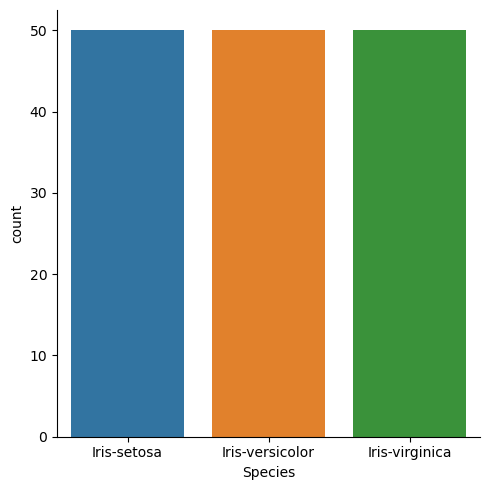

In [167]:
sns.catplot(data=iris, x='Species', kind='count')
plt.show()

- Histograma

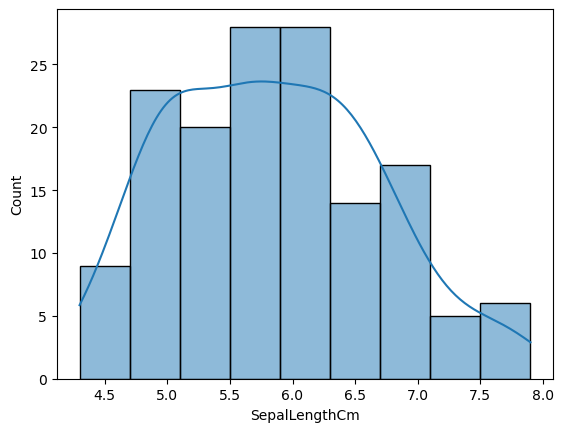

In [169]:
sns.histplot(data=iris, x='SepalLengthCm', kde=True)
plt.show()

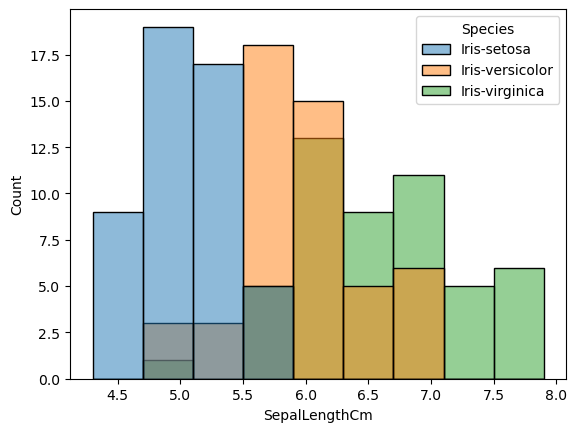

In [170]:
sns.histplot(data=iris, x='SepalLengthCm', hue='Species')
plt.show()

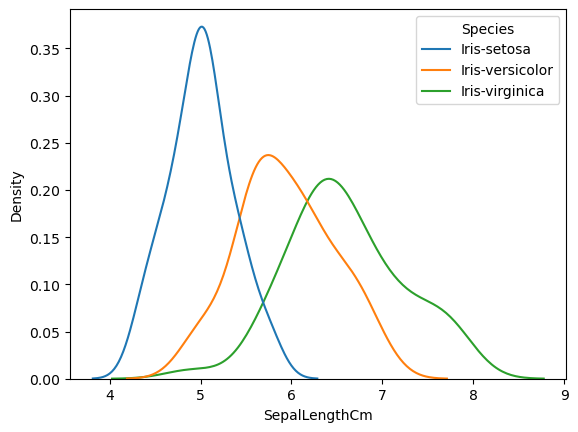

In [171]:
sns.kdeplot(data=iris, x='SepalLengthCm', hue='Species')
plt.show()

- Gráfico de cajas

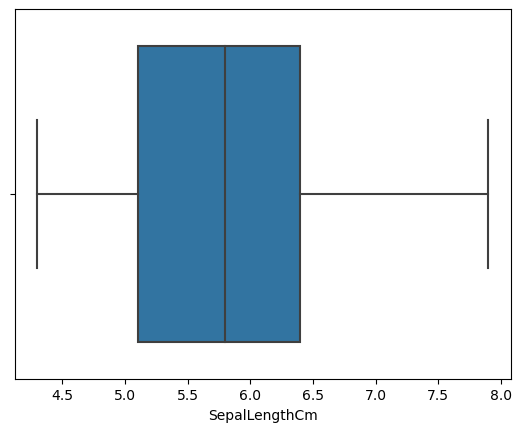

In [172]:
sns.boxplot(data=iris, x='SepalLengthCm')
plt.show()

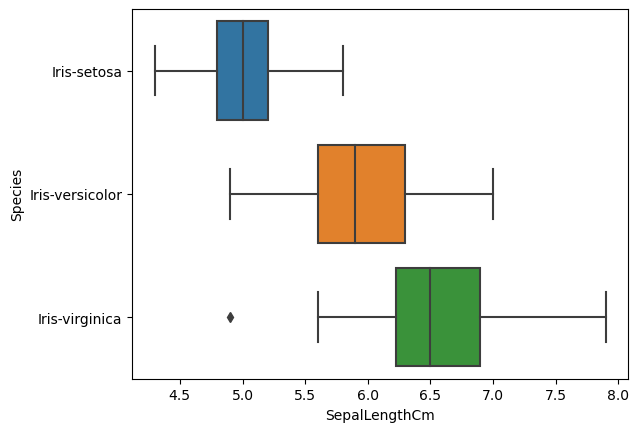

In [173]:
sns.boxplot(data=iris, x='SepalLengthCm', y='Species')
plt.show()

- Gráficos de dispersión

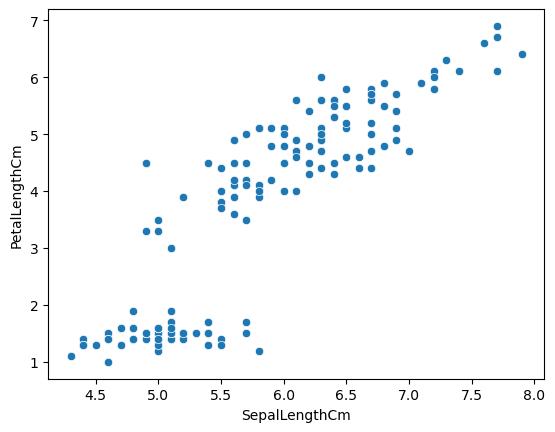

In [174]:
sns.scatterplot(data=iris, x='SepalLengthCm', y='PetalLengthCm')
plt.show()

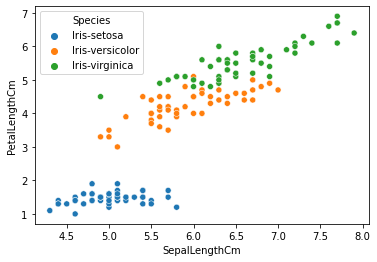

In [8]:
sns.scatterplot(data=iris, x='SepalLengthCm', y='PetalLengthCm', hue='Species')
plt.show()

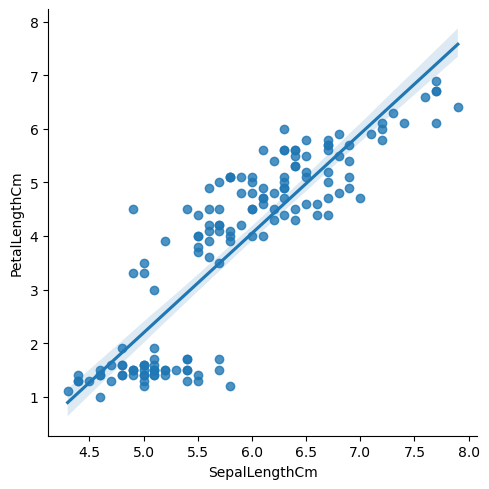

In [175]:
sns.lmplot(data=iris, x='SepalLengthCm', y='PetalLengthCm')
plt.show()

- Gráfico de correlación

In [176]:
correlacion = iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].corr()

In [177]:
correlacion

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


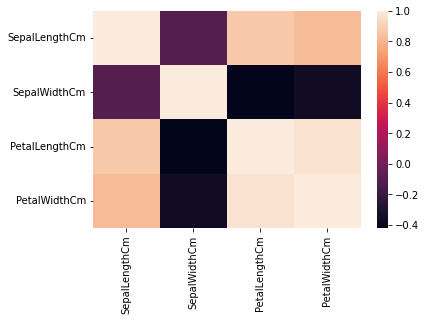

In [15]:
sns.heatmap(correlacion)
plt.show()

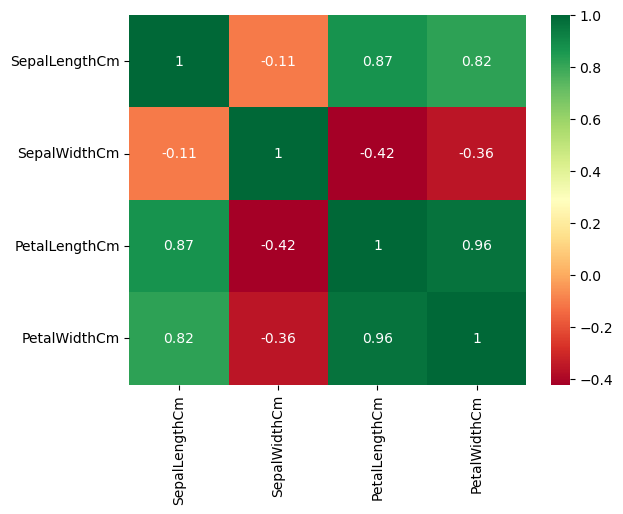

In [178]:
sns.heatmap(correlacion, cmap='RdYlGn', annot=True)
plt.show()

Como cor(x,x)=1 y cor(x,y)=cor(y,x) se puede disponer solo de la diagonal inferior.

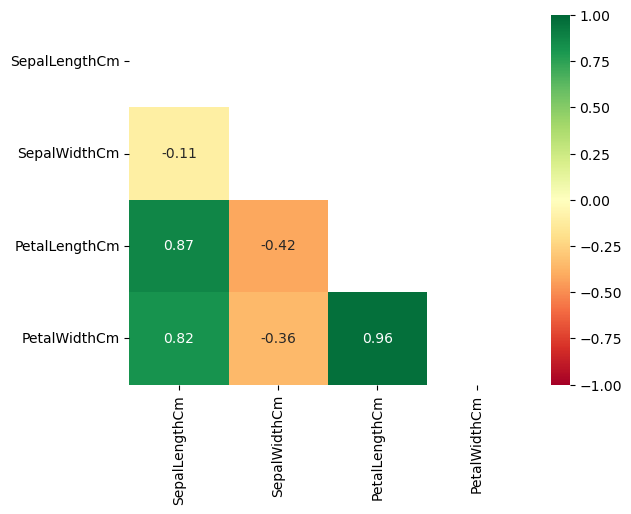

In [180]:
#La siguiente función elimina la parte superior de la matriz de correlaciones
mask = np.zeros(correlacion.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True

sns.heatmap(correlacion, annot = True, vmin = -1, vmax = 1, cmap = 'RdYlGn', mask=mask) 
#cmap para elegir la gama de colores y vmin y vmax identificar todo el espectro de valores de la correlación de pearson [-1,1]
plt.show()